In [1]:
import pandas as pd

## 1. Read CSV

In [2]:
df = pd.read_csv(
    "data/JAPAN_DATASET.csv"
)

In [3]:
df

,time,latitude,longitude,depth,mag,place,status,notes
0,2025-09-15T12:45:30.123Z,38.322,142.3690,35.0,5.1,"off east coast of Honshu, Japan",reviewed,NaN
1,2025-09-16T08:22:05.456Z,36.2048,138.2529,NaN,NaN,"near Nagano, Japan",automatic,Minor shock
2,"Sep 17, 2025, 14:10:05",43.0618,141.3545,10.2,4.8,"Hokkaido, Japan region",reviewed,NaN
3,2025-09-18T23:11:55.000Z,33.5904,130.4017,12.0,four.nine,"Fukuoka, Japan",reviewed,NaN
4,2025-09-19T05:00:00.000Z,35.6895,139.6917,-999,5.5,"Tokyo, Japan",reviewed,Data error?
5,2025-09-20T14:30:10.789Z,37.765,140.4670,25 miles,4.6,Fukushima Prefecture,automatic,NaN
6,2025-09-21T02:15:45.987Z,34.6937,135.5023,45.1,5.2,osaka,reviewed,NaN
7,22/09/2025 11:05:21,33.8562,132.7653,22.0,4.9,"Shikoku, Japan",reviewed,NaN
8,2025-09-23T18:40:00.000Z,39.702,141.1520,50.5,NaN,Sendai region,automatic,Magnitude not recorded
9,2025-09-24T09:09:09.090Z,35.4437,139.6380,30.0,5.0,Yokohama,NaN,NaN


## 2. Shape

In [4]:
df.shape

(36, 8)

## 3. Fix Dtypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       36 non-null     object 
 1   latitude   34 non-null     object 
 2   longitude  35 non-null     float64
 3   depth      33 non-null     object 
 4   mag        34 non-null     object 
 5   place      36 non-null     object 
 6   status     32 non-null     object 
 7   notes      15 non-null     object 
dtypes: float64(1), object(7)
memory usage: 2.4+ KB


In [6]:
df["time"] = pd.to_datetime(df["time"], format="mixed", utc=True)

In [7]:
df["latitude"] = pd.to_numeric(df["latitude"], errors='coerce')
df["longitude"] = pd.to_numeric(df["longitude"], errors='coerce')
df["depth"] = pd.to_numeric(df["depth"], errors='coerce')
df["mag"] = pd.to_numeric(df["mag"], errors='coerce')

## 4. Fill NaN

In [8]:
df = df.bfill()

## 5. Month

In [10]:
df['Month'] = df['time'].dt.month

## 6. Category

In [11]:
def categorize(mag):
    if mag < 4:
        return "Weak"
    elif 4 <= mag < 6:
        return "Moderate"
    else:
        return "Strong"

In [15]:
df['Category'] = df['mag'].apply(categorize)

## 7. Group By 

In [ ]:
df.groupby(['Month', 'Category']).agg(
    count=('mag', 'size'),
    mean_mag=('mag', 'mean')
)

,,count,mean_mag
Month,Category,,
9,Moderate,16,4.9625
10,Moderate,20,4.7400


## 8. region

In [18]:
df["place"]

0     off east coast of Honshu, Japan
1                  near Nagano, Japan
2              Hokkaido, Japan region
3                      Fukuoka, Japan
4                       Tokyo, Japan 
5                Fukushima Prefecture
6                               osaka
7                      Shikoku, Japan
8                       Sendai region
9                            Yokohama
10    off east coast of Honshu, Japan
11            Okinawa, Ryukyu Islands
12                   Tokyo Prefecture
13                 near Aomori, Japan
14                       Sea of Japan
15                          Hiroshima
16                       Kyoto, Japan
17                       Kyoto, Japan
18                           Nagasaki
19                   Osaka Prefecture
20                    Nagoya, Japan  
21                       near Niigata
22                           Kanazawa
23               Yamaguchi Prefecture
24                          Kagoshima
25                       Tokyo, Japan
26          

In [ ]:
import re

def extract_region(place):
    p = place.strip().lower()
    p = re.sub(r'\s+', ' ', p)
    p = p.replace('region', '').replace('prefecture', '').strip()
    
    match_full = re.search(r'\b[\w\s\-]+ of (?:japan|islands?)\b', p)
    if match_full:
        region = match_full.group(0)
    
    else:
        match = re.search(r'(?:of|near|offshore|central)\s+([\w\s\-]+)', p)
        if match:
            region = match.group(1)
        else:
            if ',' in p:
                region = p.split(',')[0]
            else:
                region = p
        region = re.sub(r'\b(?:japan|islands?)\b', '', region).strip()
        
    region = region.title()
    
    return region


In [43]:
df["region"] = df['place'].apply(extract_region)

## 9. Analysis

In [46]:
df.groupby('region').size()

region
Aomori          1
Chiba           1
Fukuoka         1
Fukushima       1
Hiroshima       1
Hokkaido        2
Honshu          2
Kagoshima       1
Kanazawa        1
Kansai          1
Kyoto           2
Nagano          1
Nagasaki        1
Nagoya          2
Niigata         1
Oita            1
Okinawa         2
Osaka           2
Sea Of Japan    1
Sendai          2
Shikoku         1
Takamatsu       1
Tokyo           4
Yamaguchi       1
Yokohama        2
dtype: int64

In [47]:
df.groupby('region')[['mag', 'depth']].mean()

,mag,depth
region,,
Aomori,5.00,60.10
Chiba,4.90,15.00
Fukuoka,5.50,12.00
Fukushima,4.60,45.10
Hiroshima,4.40,80.00
Hokkaido,4.80,10.20
Honshu,5.10,35.00
Kagoshima,4.70,2000.00
Kanazawa,4.20,20.00


In [48]:
df.groupby('region')[['mag', 'depth']].max()

,mag,depth
region,,
Aomori,5.0,60.1
Chiba,4.9,15.0
Fukuoka,5.5,12.0
Fukushima,4.6,45.1
Hiroshima,4.4,80.0
Hokkaido,4.8,10.2
Honshu,5.1,35.0
Kagoshima,4.7,2000.0
Kanazawa,4.2,20.0


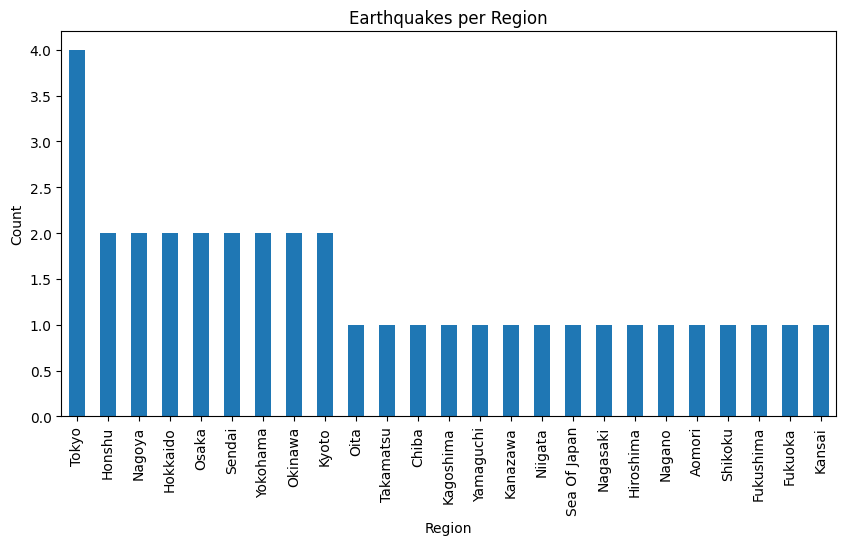

In [49]:
import matplotlib.pyplot as plt

region_counts = df['region'].value_counts()
region_counts.plot(kind='bar', figsize=(10,5), title=f'Earthquakes per Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()